In [1]:
from utils import get_all_data, read_dataset, mean_square_error,generateSinData
from gp import GaussianProcess, SparseGaussianProcess
from kernels import ARDKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
domain = np.linspace(-2*np.pi, 2*np.pi, 100)
Xdomain = np.matrix([[point,np.random.randn(1)] for point in domain])
X,Y = generateSinData(100)
# shuffeling the input
indices = np.arange(len(Y))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

In [16]:
sgp = SparseGaussianProcess(X,Y,10)
fullgp = GaussianProcess(X,Y) 

In [23]:
spred= sgp.getPosteriorPredictive()

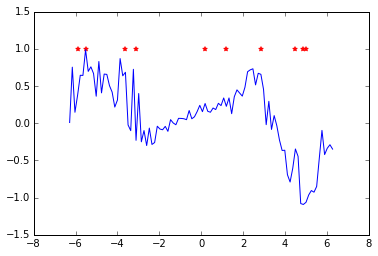

In [24]:
mu, covar = spred(Xdomain)
plt.plot(Xdomain[:,0],mu)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.ones(sgp.M),color="red",marker="*")

In [25]:
cost = []
rms = sgp.RMSprop()

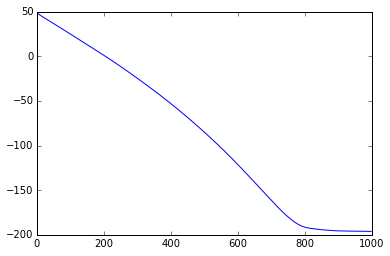

In [26]:
for i in range(1000):
    cost.append(rms(sgp.xtrain))
plt.plot(cost)

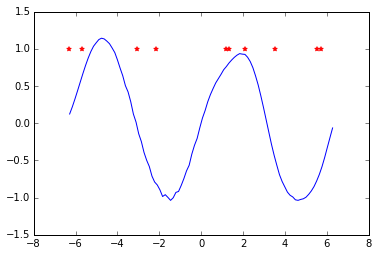

In [27]:
mu, covar = pred(Xdomain)
plt.plot(Xdomain[:,0],mu)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.ones(sgp.M),color="red",marker="*")

In [17]:
cost = []
rms = fullgp.RMSprop()

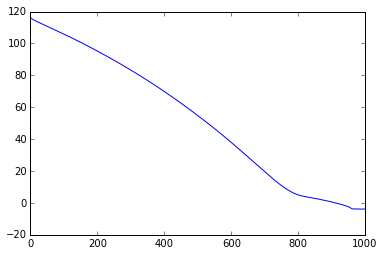

In [19]:
for i in range(500):
    cost.append(rms())
plt.plot(cost)

In [28]:
fpred= fullgp.getPosteriorPredictive()

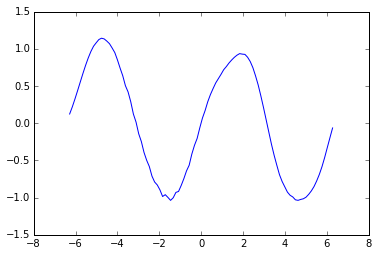

In [29]:
mu, covar = fpred(Xdomain)
plt.plot(Xdomain[:,0],mu)